Import all necessary libraries


In [7]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

import hashlib
import datetime

# import time
# from datetime import datetime
from time import strftime, gmtime

import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

sns.set_theme(style="darkgrid")
from data_loading import load_data
from functions import *

from sklearn.model_selection import cross_val_score

from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

Load all data

In [9]:
# import data by using the load_data() function
flights_test, flights_train = load_data()


Determine features and train sets

In [10]:
display(flights_train)

,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,scheduled_departure_date_time,scheduled_departure_date,scheduled_departure_timestamp,departure_date_time,departure_timestamp,initial_delay,initial_delay_sum,initial_delay_mean
2290,2290,2015,1,1,4,AA,1,N787AA,JFK,LAX,...,1230,7.0,2015-01-01 09:00:00,2015-01-01,1.420103e+09,2015-01-01 08:55:00,1.420102e+09,-5.0,1287.0,4.697080
17227,17227,2015,1,2,5,AA,1,N795AA,JFK,LAX,...,1230,-19.0,2015-01-02 09:00:00,2015-01-02,1.420189e+09,2015-01-02 08:50:00,1.420189e+09,-10.0,1222.0,4.046358
33369,33369,2015,1,3,6,AA,1,N788AA,JFK,LAX,...,1230,-39.0,2015-01-03 09:00:00,2015-01-03,1.420276e+09,2015-01-03 08:53:00,1.420275e+09,-7.0,7689.0,27.265957
48487,48487,2015,1,4,7,AA,1,N791AA,JFK,LAX,...,1230,-12.0,2015-01-04 09:00:00,2015-01-04,1.420362e+09,2015-01-04 08:53:00,1.420362e+09,-7.0,14750.0,50.170068
64581,64581,2015,1,5,1,AA,1,N783AA,JFK,LAX,...,1230,-8.0,2015-01-05 09:00:00,2015-01-05,1.420448e+09,2015-01-05 08:53:00,1.420448e+09,-7.0,3984.0,13.551020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816718,2816718,2015,6,30,2,WN,5888,N520SW,AUS,DAL,...,2055,36.0,2015-06-30 20:00:00,2015-06-30,1.435694e+09,2015-06-30 20:42:00,1.435697e+09,42.0,1530.0,10.928571
2817815,2817815,2015,6,30,2,WN,5888,N629SW,DAL,MAF,...,2235,25.0,2015-06-30 21:30:00,2015-06-30,1.435700e+09,2015-06-30 22:02:00,1.435702e+09,32.0,3437.0,18.281915
2534629,2534629,2015,6,13,6,WN,5889,N555LV,PHX,TPA,...,2310,-16.0,2015-06-13 16:10:00,2015-06-13,1.434212e+09,2015-06-13 16:11:00,1.434212e+09,1.0,6471.0,15.119159
2648771,2648771,2015,6,20,6,WN,5889,N446WN,PHX,TPA,...,2310,11.0,2015-06-20 16:10:00,2015-06-20,1.434817e+09,2015-06-20 16:38:00,1.434818e+09,28.0,5764.0,13.435897


Add column named 'Delayed_with_margin' and visualize outcomes in a plot

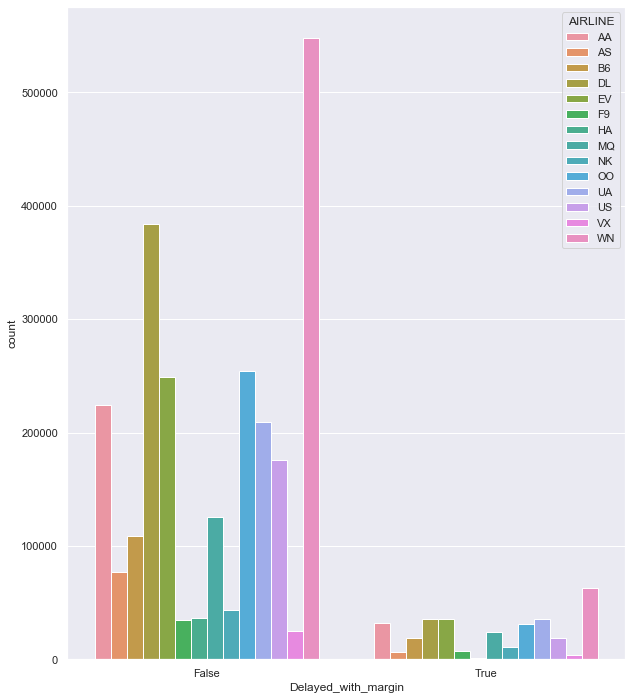

In [11]:
# functions to add margin as a tryout
flights_train['Delayed_with_margin'] = flights_train['ARRIVAL_DELAY'].apply(delayed_with_margin)
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='Delayed_with_margin',hue='AIRLINE',data=flights_train)
plt.show()


In [16]:
origin_features =  ['DISTANCE', 'SCHEDULED_TIME', 'initial_delay',
                    'SCHEDULED_ARRIVAL', 'scheduled_departure_timestamp',
                    'TAXI_OUT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                    'WHEELS_OFF', 'departure_timestamp', 'DAY', 'ARRIVAL_DELAY'
                    # 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                    # 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                    ]

arrival_delay = 'Delayed_with_margin'

# using the full set for training
training_set = flights_train[origin_features + [arrival_delay]].sample(10000)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(arrival_delay, axis=1)
y = training_set[arrival_delay]

features = X.columns

# built a validation set on flights_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1628008 to 1847791
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DISTANCE                       300000 non-null  int64  
 1   SCHEDULED_TIME                 300000 non-null  float64
 2   initial_delay                  300000 non-null  float64
 3   SCHEDULED_ARRIVAL              300000 non-null  int64  
 4   scheduled_departure_timestamp  300000 non-null  float64
 5   TAXI_OUT                       300000 non-null  float64
 6   SCHEDULED_DEPARTURE            300000 non-null  int64  
 7   DEPARTURE_TIME                 300000 non-null  float64
 8   WHEELS_OFF                     300000 non-null  float64
 9   departure_timestamp            300000 non-null  float64
 10  DAY                            300000 non-null  int64  
 11  ARRIVAL_DELAY                  300000 non-null  float64
dtypes: float64(8), int64(4)

In [17]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor()
    ]

In [18]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
results=[]

row_index = 0
for alg in MLA:
    
    cv_results = cross_val_score(alg, X_train, y_train, cv=10)
    results.append(cv_results)
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA AUC
0,AdaBoostRegressor,1.0000,1.0000,1.000000
1,BaggingRegressor,1.0000,1.0000,1.000000
3,GradientBoostingRegressor,1.0000,1.0000,1.000000
4,RandomForestRegressor,1.0000,1.0000,1.000000
6,DecisionTreeRegressor,1.0000,1.0000,1.000000
2,ExtraTreesRegressor,1.0000,0.9972,1.000000
7,ExtraTreeRegressor,1.0000,0.9788,0.992612
5,KNeighborsRegressor,0.3085,-0.0493,0.626161


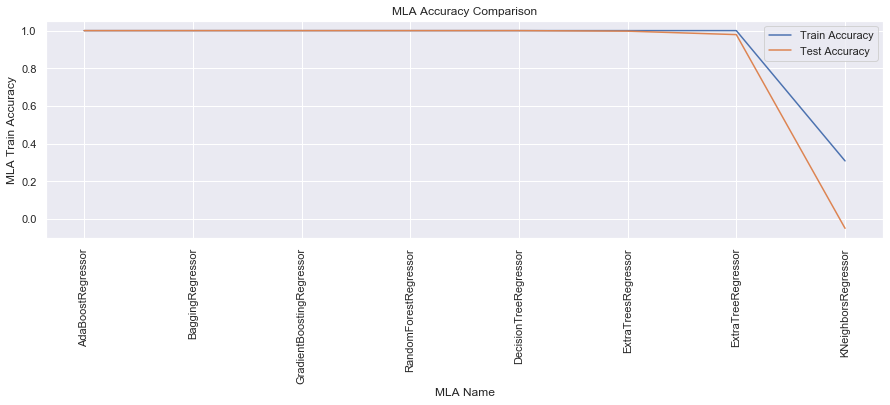

In [19]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

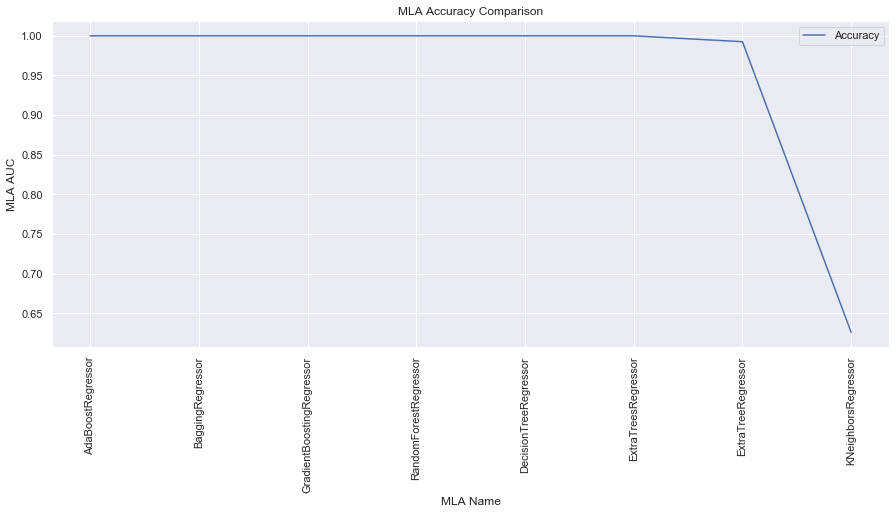

In [20]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',label='Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

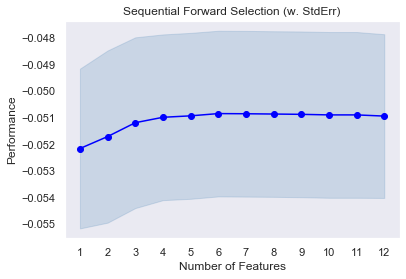

In [21]:
lr = LinearRegression()
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=10)
model = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [22]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (0, 1, 2, 5, 8, 11)


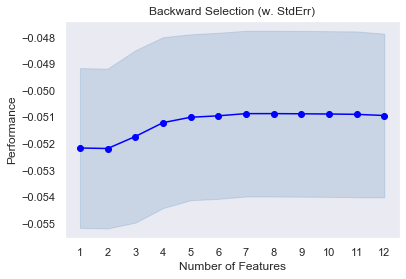

In [23]:
lr = LinearRegression()
sfs2 = SFS(lr, k_features='best', forward=False, floating=False, 
          scoring='neg_mean_squared_error', cv=10)
model = sfs2.fit(X_train, y_train)

fig = plot_sfs(sfs2.get_metric_dict(), kind='std_err')

plt.title('Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [24]:
print('Selected features:', sfs2.k_feature_idx_)

Selected features: (0, 1, 4, 5, 8, 9, 11)
